# Testing API key

In [1]:
import requests

with open('C:/Users/Patrick/Syracuse_courses/IST_736/HW5/api_key', 'r') as f:
    key = f.read()

url = f"https://newsapi.org/v2/everything?q=football&sources=fox-news&pageSize=30&apiKey={key}&language=en"

response = requests.get(url)
jsontxt = response.json()
print(jsontxt, "\n")

{'status': 'ok', 'totalResults': 341, 'articles': [{'source': {'id': 'fox-news', 'name': 'Fox News'}, 'author': 'Kurt Knutsson, CyberGuy Report', 'title': 'The most talked-about Super Bowl ads of 2024', 'description': 'Kurt “CyberGuy" Knutsson gives you a peek at some of the most highly anticipated ads that you can expect to enjoy on Super Bowl Sunday this year.', 'url': 'https://www.foxnews.com/tech/the-most-talked-about-super-bowl-ads-of-2024', 'urlToImage': 'https://static.foxnews.com/foxnews.com/content/uploads/2024/02/Allegiant-Stadium.jpg', 'publishedAt': '2024-02-06T11:00:05Z', 'content': 'The biggest game of the year is right around the corner, and that means that some of the best commercials will be airing. There will be plenty of star-studded ads from some of the biggest companies i… [+6382 chars]'}, {'source': {'id': 'fox-news', 'name': 'Fox News'}, 'author': 'Kim Komando', 'title': 'Tech life upgrades smarter than the stuff on TikTok', 'description': 'Avoid the misleading T

# Connect to API

In [2]:
topics = ["tesla", "electric vehicles", "ev", "elon musk"]
endpoint = 'https://newsapi.org/v2/everything'

In [3]:
import pandas as pd

filename = "C:/Users/Patrick/Syracuse_courses/IST_736/HW5/AllAboutEVs.csv"
with open(filename, "w", encoding='utf8') as f:  # "a"  for append   "r" for read
    my_file = f.write('LABEL,Date,Source,Title,Headline\n')
    
df = pd.read_csv(filename)
df.head()

,LABEL,Date,Source,Title,Headline


In [4]:
import re

for topic in topics:

    ## Dictionary Structure
    URLPost = {'apiKey':key,
               'q':topic,
               'language':'en'
    }

    response = requests.get(endpoint, URLPost)
    print(response)
    jsontxt = response.json()
    print(jsontxt)
    #####################################################
    
    
    ## Open the file for append
    with open(filename, "a") as f:
        
        # 'LABEL,Date,Source,Title,Headline\n'
        
        # LABEL
        LABEL = topic
        for items in jsontxt["articles"]:
            print(items, "\n\n\n")

            # Date
            Date = items["publishedAt"]
            ##clean up the date
            NewDate = Date.split("T")
            Date = NewDate[0]
            print(Date)

            # Source
            Source = items["source"]["name"]
            print(Source)

            ## CLEAN the Title
            ##----------------------------------------------------------
            ## Replace punctuation with space
            # Accept one or more copies of punctuation         
            # plus zero or more copies of a space
            # and replace it with a single space
            Title = items["title"]
            Title = str(Title)
            print(Title)
            
            Title = re.sub(r'[,.;@#?!&$\-\']+', ' ', str(Title), flags=re.IGNORECASE)
            Title = re.sub(' +', ' ', str(Title), flags=re.IGNORECASE)
            Title = re.sub(r'\"', ' ', str(Title), flags=re.IGNORECASE)

            # and replace it with a single space
            ## NOTE: Using the "^" on the inside of the [] means
            ## we want to look for any chars NOT a-z or A-Z and replace
            ## them with blank. This removes chars that should not be there.
            Title = re.sub(r'[^a-zA-Z]', " ", str(Title), flags=re.VERBOSE)
            Title = Title.replace(',', '')
            Title = ' '.join(Title.split())
            Title = re.sub("\n|\r", "", Title)


            Headline = items["description"]
            Headline = str(Headline)
            Headline = re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
            Headline = re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
            Headline = re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
            Headline = re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)

            ## Be sure there are no commas in the headlines or it will
            ## write poorly to a csv file....
            Headline = Headline.replace(',', '')
            Headline = ' '.join(Headline.split())
            Headline = re.sub("\n|\r", "", Headline)

            WriteThis = str(LABEL)+","+str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
            print('Write to CSV file:')
            print(WriteThis)

            my_file = f.write(WriteThis)

<Response [200]>
{'status': 'ok', 'totalResults': 8076, 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'}, 'author': 'Kris Holt', 'title': 'Tesla has won the EV charging wars', 'description': 'Stellantis\r\n is the latest manufacturer to commit to using Tesla’s NACS (North American Charging Standard). The company was the last remaining holdout among major automakers, meaning the NACS is becoming a true common standard.\nAccording to a press release\r\n,…', 'url': 'https://www.engadget.com/tesla-has-won-the-ev-charging-wars-155726724.html', 'urlToImage': 'https://s.yimg.com/ny/api/res/1.2/5gs2rVU07wParCpFZnhvVA--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD04MDA-/https://s.yimg.com/os/creatr-uploaded-images/2024-02/7001e0f0-c9bc-11ee-bfeb-9782a05a18ea', 'publishedAt': '2024-02-12T15:57:26Z', 'content': 'Stellantis\r\n is the latest manufacturer to commit to using Teslas NACS (North American Charging Standard). The company was the last remaining holdout among major automakers, meaning

# Create Word Clouds

In [5]:
df = pd.read_csv(filename)
df

,LABEL,Date,Source,Title,Headline
0,tesla,2024-02-12,Engadget,Tesla has won the EV charging wars,Stellantis is the latest manufacturer to commi...
1,tesla,2024-02-01,Yahoo Entertainment,Tesla sued by California counties for allegedl...,Tesla is facing a lawsuit from California coun...
2,tesla,2024-02-02,Engadget,Tesla settles California hazardous waste lawsu...,Tesla and the California counties that sued th...
3,tesla,2024-01-27,Yahoo Entertainment,The Morning After A cheaper Tesla Apple s EV p...,Sorry to interrupt your Saturday but The Pokem...
4,tesla,2024-01-26,Yahoo Entertainment,Tesla recalls vehicles because of a faulty bac...,Tesla is recalling vehicles in the US due to a...
...,...,...,...,...,...
395,elon musk,2024-02-09,Yahoo Entertainment,Elon Musk s Million Uninsured McLaren F Crash ...,In the pantheon of supercars the McLaren F occ...
396,elon musk,2024-01-12,Boing Boing,Musk wants Twitter to pivot to video,Twitter owner Elon Musk muting accounts that a...
397,elon musk,2024-02-12,Business Insider,Tesla didn t run a Super Bowl ad But a tech CE...,The Dawn Project aired anti Tesla Super Bowl a...
398,elon musk,2024-01-24,Business Insider,Apple Zuck Elon and the lesson of Microsoft Wi...,Apple s EV and goggles Meta s investment in AI...


In [6]:
from wordcloud import WordCloud

List_of_WC = []

for topic in topics:

    tempdf = df[df['LABEL'] == topic]
    print(tempdf.head())
    
#     tempdf = tempdf.sum(axis=0, numeric_only=True)
#     print(tempdf)
    
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                   min_word_length=4, #mask=next_image,
                   max_words=200).generate(str(tempdf))
    
    ## Here, this list holds all the wordclouds I am building
    List_of_WC.append(NextVarName)
    
print(List_of_WC)

   LABEL        Date               Source  \
0  tesla  2024-02-12             Engadget   
1  tesla  2024-02-01  Yahoo Entertainment   
2  tesla  2024-02-02             Engadget   
3  tesla  2024-01-27  Yahoo Entertainment   
4  tesla  2024-01-26  Yahoo Entertainment   

                                               Title  \
0                 Tesla has won the EV charging wars   
1  Tesla sued by California counties for allegedl...   
2  Tesla settles California hazardous waste lawsu...   
3  The Morning After A cheaper Tesla Apple s EV p...   
4  Tesla recalls vehicles because of a faulty bac...   

                                            Headline  
0  Stellantis is the latest manufacturer to commi...  
1  Tesla is facing a lawsuit from California coun...  
2  Tesla and the California counties that sued th...  
3  Sorry to interrupt your Saturday but The Pokem...  
4  Tesla is recalling vehicles in the US due to a...  
                 LABEL        Date     Source  \
100  electric

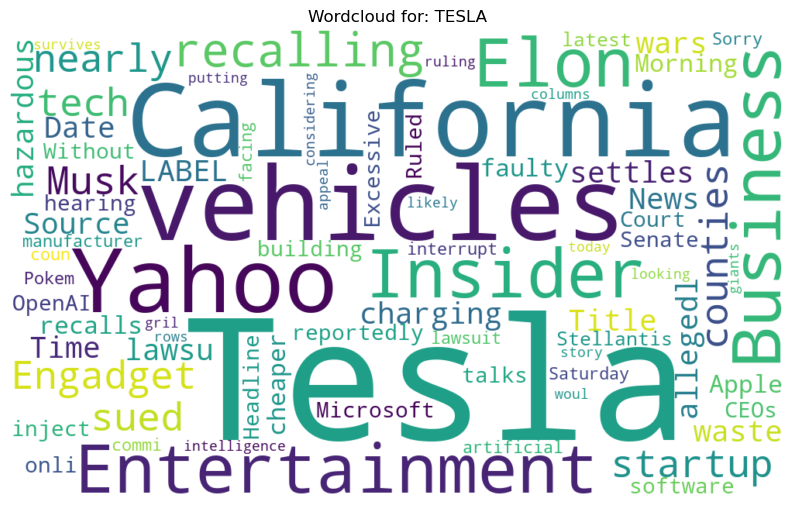

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(List_of_WC[0], interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for: ' + topics[0].upper())
plt.show()

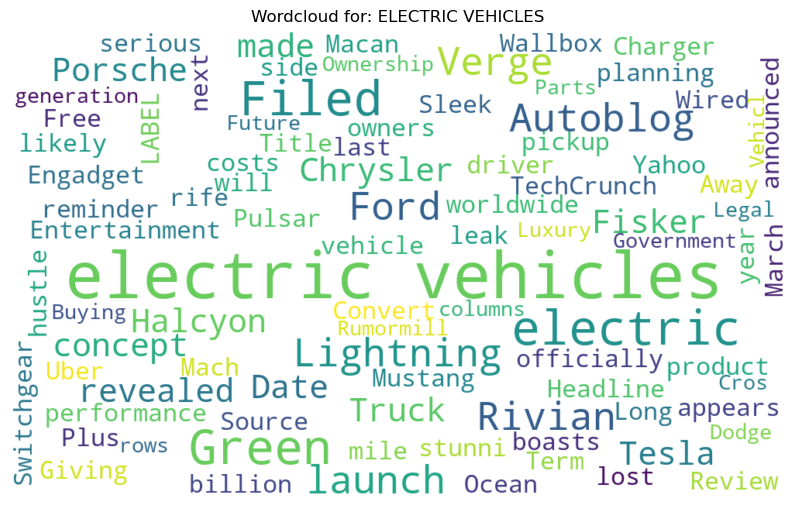

In [8]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(List_of_WC[1], interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for: ' + topics[1].upper())
plt.show()

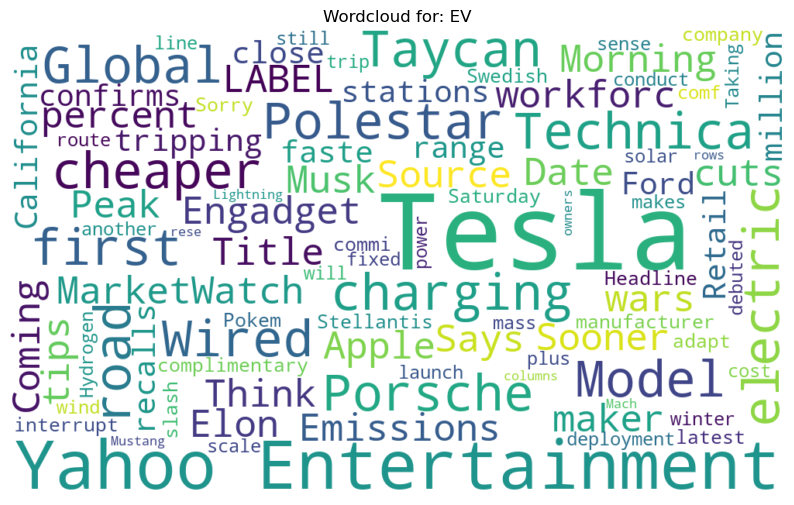

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(List_of_WC[2], interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for: ' + topics[2].upper())
plt.show()

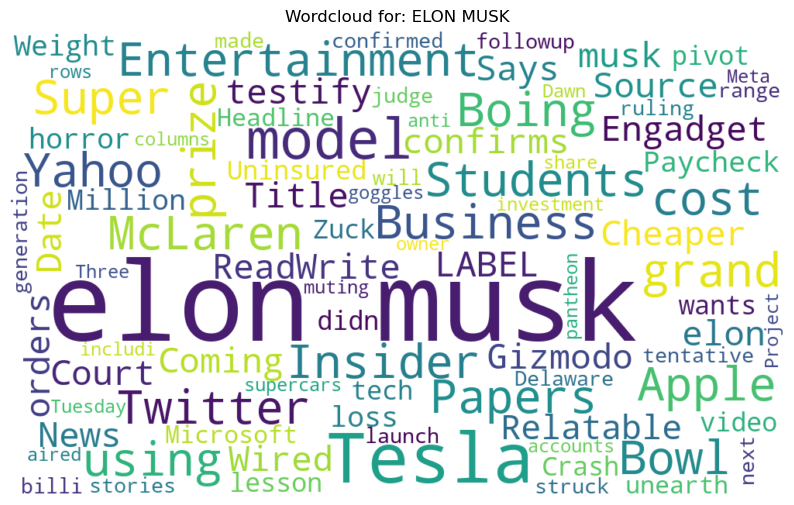

In [10]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(List_of_WC[3], interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for: ' + topics[3].upper())
plt.show()